In [74]:
import pandas as pd

df = pd.read_csv('../SanDiegoWeather.csv')

# remove duplicate timepoints
df.drop_duplicates('dt', inplace=True)

# data from 2017 and beyond
df = df.loc[ df['dt'] >= 1483257600, ['dt','dt_iso','rain_1h'] ]

df.head()



,dt,dt_iso,rain_1h
27603,1483257600,2017-01-01 08:00:00 +0000 UTC,NaN
27605,1483261200,2017-01-01 09:00:00 +0000 UTC,NaN
27606,1483264800,2017-01-01 10:00:00 +0000 UTC,NaN
27607,1483268400,2017-01-01 11:00:00 +0000 UTC,NaN
27608,1483272000,2017-01-01 12:00:00 +0000 UTC,NaN


In [75]:
from datetime import datetime
from pytz import timezone

# convert UTC datetime to San Dieto date
df['Date'] = [ datetime.fromtimestamp(dt, tz=timezone('US/Pacific')).strftime("%Y-%m-%d") for dt in df['dt'] ]
df.head()

,dt,dt_iso,rain_1h,Date
27603,1483257600,2017-01-01 08:00:00 +0000 UTC,NaN,2017-01-01
27605,1483261200,2017-01-01 09:00:00 +0000 UTC,NaN,2017-01-01
27606,1483264800,2017-01-01 10:00:00 +0000 UTC,NaN,2017-01-01
27607,1483268400,2017-01-01 11:00:00 +0000 UTC,NaN,2017-01-01
27608,1483272000,2017-01-01 12:00:00 +0000 UTC,NaN,2017-01-01


In [76]:
# get total rain per date
gb = df.groupby('Date')['rain_1h'].sum()

df2 = pd.DataFrame(gb)
df2.rename(columns={'rain_1h':'Total Rain (mm)'}, inplace=True)
df2.head()

#rain_by_date_df.head(20)

,Total Rain (mm)
Date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


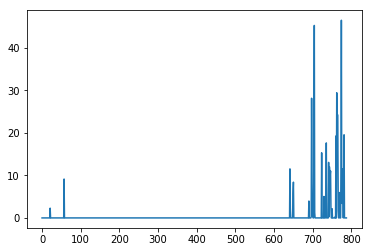

In [88]:
import matplotlib.pyplot as plt

x = list(range(len(df2)))
y = df2['Total Rain (mm)']
plt.plot(x,y)